In [3]:
import numpy as np # linear algerbra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import json # data processing(.json)

In [4]:
from sklearn.preprocessing import LabelEncoder # Creates placeholders for categorical variables
from sklearn.feature_extraction.text import CountVectorizer # converts text into vector matrix
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.naive_bayes import MultinomialNB # ML model for naive bayes
from sklearn.metrics import accuracy_score, confusion_matrix # measure the accuracy of the model
from sklearn.metrics import classification_report # classification report of the model

In [5]:
import re # NLP
import nltk # natural langauge processing
from nltk.tokenize import word_tokenize # tokenizer
from nltk.stem import PorterStemmer # stemmer
from nltk.corpus import stopwords # stopwords

from wordcloud import WordCloud # create word cloud images of text

In [6]:

import tensorflow as tf # create neural networks
from tensorflow.keras import Sequential # create squential NN model
from tensorflow.keras.layers import Dense # implements the operation: output = activation(dot(input, kernel) + bias)
from tensorflow.keras.utils import plot_model # plot model architecture
from tensorflow.keras.callbacks import EarlyStopping # early stopping of training
from tensorflow.keras.models import load_model # load saved model

from sklearn.model_selection import GridSearchCV # hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV # hyperparameter optimization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier # linking keras model to sklearn

%matplotlib inline 

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv', encoding='utf-8').copy() # creates a dataframe of a copy of the dataset
                                                           # utf-8 encoding use to be able to read text in other langauge
print(data.shape)  # shape of the dataset
data.head()

(22000, 2)


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [8]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [9]:
data.tail()

,Text,language
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese
21999,aprilie sonda spațială messenger a nasa și-a ...,Romanian


In [10]:
data['language'].unique() 

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

In [11]:
# checking for null values

data.isnull().sum()

Text        0
language    0
dtype: int64

In [12]:
data.dtypes

Text        object
language    object
dtype: object

In [13]:
data['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [14]:

data = data.drop_duplicates(subset='Text')
data = data.reset_index(drop=True)

In [15]:

data['language'].value_counts()

Chinese       1000
Thai          1000
English       1000
Japanese      1000
Turkish       1000
Romanian      1000
Urdu          1000
Persian       1000
Korean        1000
Estonian       999
Russian        999
Arabic         998
Portugese      997
Spanish        996
Dutch          996
Pushto         993
Swedish        992
Hindi          990
French         990
Tamil          981
Indonesian     975
Latin          953
Name: language, dtype: int64

In [16]:
import nltk
nltk.download('stopwords')
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
nonalphanumeric = ['\'', '.', ',', '\"', ':', ';', '!', '@', '#', '$', '%', '^', '&',
                 '*', '(', ')', '-', '_', '+', '=', '[', ']', '{', '}', '\\', '?', 
                 '/','>', '<', '|', ' '] 

stopwords = nonalphanumeric

In [18]:
# total stop words

len(stopwords)

31

In [19]:
def clean_text(text):
    """
    takes text as input and returns cleaned text after tokenization, 
    stopwords removal and stemming
    """
    tokens = word_tokenize(text) # creates text into list of words
    words = [word.lower() for word in tokens if word not in stopwords] # creates a list with words which are not stopwords
    words = [PorterStemmer().stem(word) for word in words] # stems(remove suffixes and prefixes)  words
    return " ".join(words) # joins the list of cleaned words into a sentence string

In [20]:
# applying clean_text function to all rows in 'Text' column 
import nltk
nltk.download('punkt')
data['clean_text'] = data['Text'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
le = LabelEncoder()
data['language_encoded'] = le.fit_transform(data['language'])
data.head()

,Text,language,clean_text,language_encoded
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameer ning pai...,4
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebe joseph pereira thoma på eng the jesuit an...,17
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,19
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,18
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spon behoort tot het geslacht haliclona en ...,2


In [22]:
lang_list = [i for i in range(22)]
lang_list = le.inverse_transform(lang_list)
lang_list = lang_list.tolist()
lang_list

['Arabic',
 'Chinese',
 'Dutch',
 'English',
 'Estonian',
 'French',
 'Hindi',
 'Indonesian',
 'Japanese',
 'Korean',
 'Latin',
 'Persian',
 'Portugese',
 'Pushto',
 'Romanian',
 'Russian',
 'Spanish',
 'Swedish',
 'Tamil',
 'Thai',
 'Turkish',
 'Urdu']

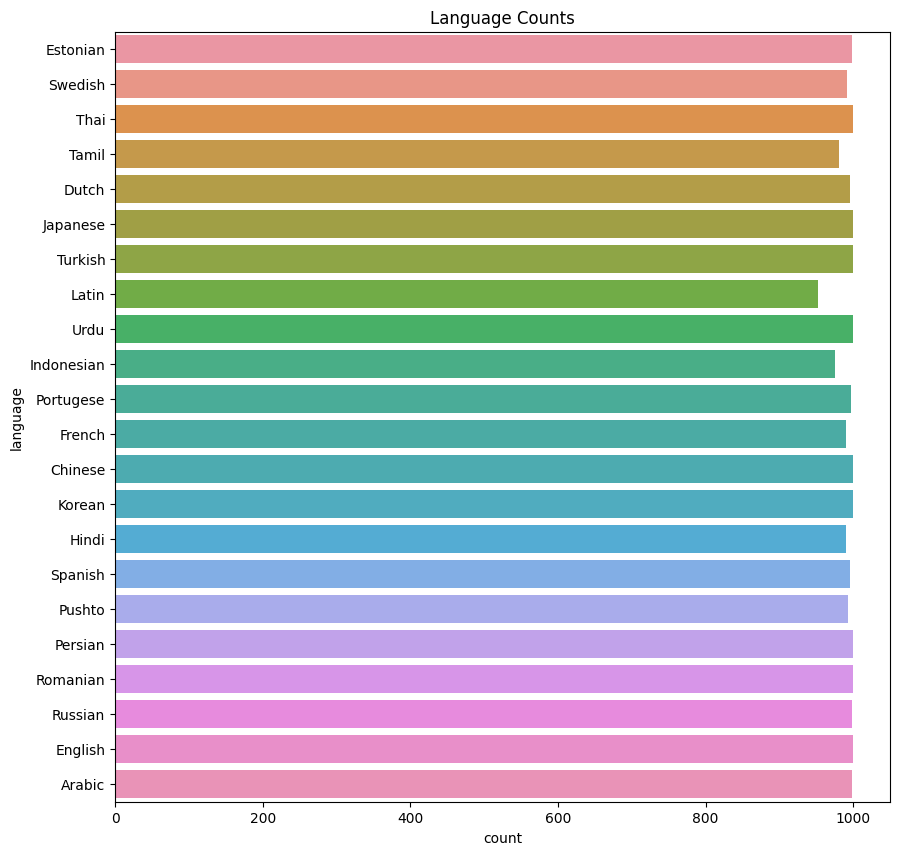

In [23]:
plt.figure(figsize=(10,10))
plt.title('Language Counts')
ax = sns.countplot(y=data['language'], data=data)
plt.show()

In [24]:
def remove_english(text):
    """
    function that takes text as input and returns text without english words
    """
    pat = "[a-zA-Z]+"
    text = re.sub(pat, "", text)
    return text


In [25]:
data_Chinese = data[data['language']=='Chinese'] # Chinese data in dataset

clean_text = data.loc[data.language=='Chinese']['clean_text']
clean_text = clean_text.apply(remove_english) # removing english words

data_Chinese.loc[:,'clean_text'] = clean_text

<ipython-input-25-5377dc0f1a09>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Chinese.loc[:,'clean_text'] = clean_text


In [26]:
# removing old chinese text and appending new cleaned chinese text

data.drop(data[data['language']=='Chinese'].index, inplace=True, axis=0)
data = data.append(data_Chinese)

<ipython-input-26-5d5aa5219218>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_Chinese)


In [27]:
# shuffling dataframe and resetting index

data =data.sample(frac=1).reset_index(drop=True)

In [28]:
# defining input variable
# vectorizing input varible 'clean_text' into a matrix 

x = data['clean_text']

cv = CountVectorizer() # ngram_range=(1,2)
x = cv.fit_transform(x)

# changing the datatype of the number into uint8 to consume less memory
x = x.astype('uint8') # uint8 and float32

In [29]:
# defining target variable

y = data['language_encoded']

In [30]:
# splitting data into training and testing datasets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [31]:
# fitting the Multinomial Naive Bayes model

NB_model = MultinomialNB()
NB_model.fit(x_train, y_train)

MultinomialNB()

In [32]:
# predicting using the naive bayes model

y_pred = NB_model.predict(x_test)

In [33]:
accuracy_score(y_test, y_pred)

0.957227813357731

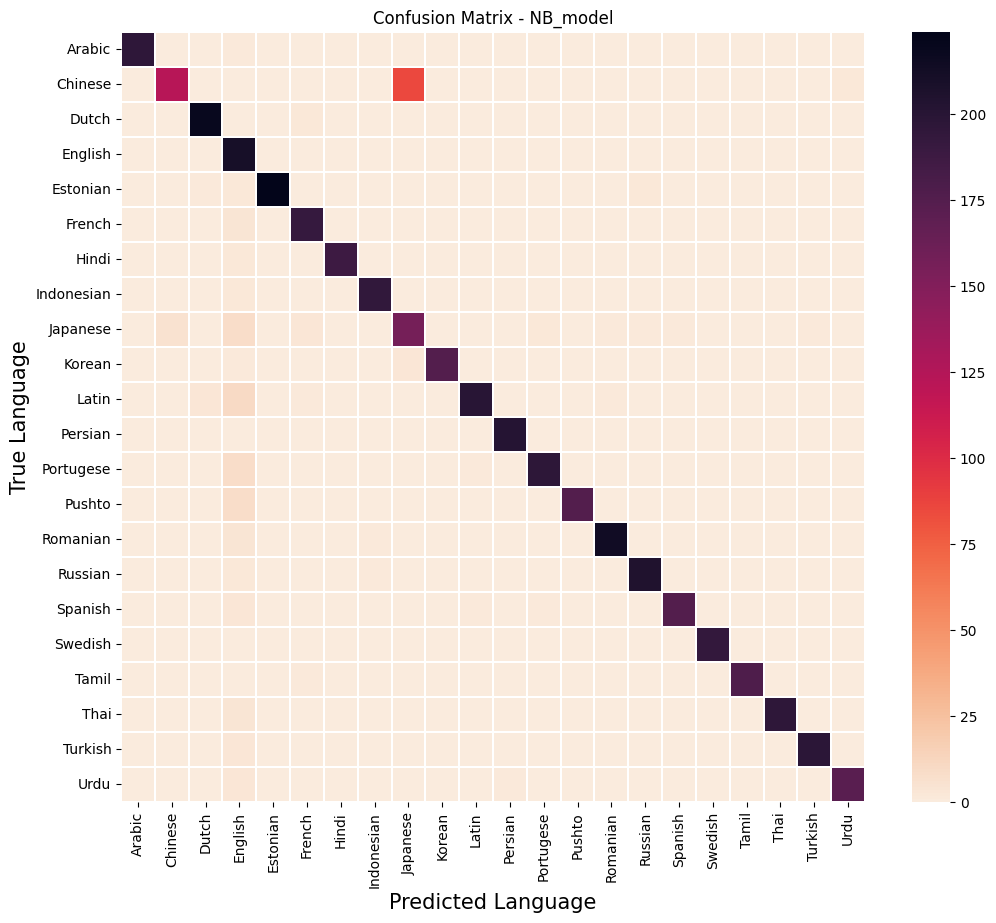

In [34]:
# creating confusion matrix heatmap 

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - NB_model')
sns.heatmap(cm, xticklabels=lang_list, yticklabels=lang_list, cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       197
           1       0.95      0.59      0.73       210
           2       0.98      0.99      0.99       221
           3       0.76      1.00      0.87       210
           4       1.00      0.98      0.99       229
           5       0.96      0.98      0.97       196
           6       1.00      0.99      0.99       190
           7       0.99      0.99      0.99       197
           8       0.64      0.87      0.74       180
           9       1.00      0.98      0.99       179
          10       0.99      0.93      0.96       215
          11       1.00      1.00      1.00       202
          12       0.98      0.96      0.97       206
          13       1.00      0.96      0.98       183
          14       0.99      0.98      0.98       219
          15       0.99      0.99      0.99       208
          16       0.99      0.97      0.98       180
          17       1.00    

In [36]:
# converting csr matrix into np.ndarray supported by tensorflow

x_train = x_train.toarray()
x_test = x_test.toarray()

In [37]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(17487, 264258) (4372, 264258) (17487,) (4372,)


In [38]:
# input size hyperparameter

INPUT_SIZE = x_train.shape[1]
INPUT_SIZE

264258

In [39]:
# outputsize hyperparatmeter

OUTPUT_SIZE = len(data['language_encoded'].unique())
OUTPUT_SIZE

22

In [40]:
# epochs and batch_size hyperparameters

EPOCHS = 10
BATCH_SIZE = 128

In [41]:
# creating the MLP model

model = Sequential([
    Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(INPUT_SIZE,)),
    Dense(80, activation='relu', kernel_initializer='he_normal'),
    Dense(50, activation='relu', kernel_initializer='he_normal'),
    Dense(OUTPUT_SIZE, activation='softmax')
])

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
hist = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.3, verbose=2)

Epoch 1/10
96/96 - 111s - loss: 0.9403 - accuracy: 0.8712 - val_loss: 0.1866 - val_accuracy: 0.9604 - 111s/epoch - 1s/step
Epoch 2/10
96/96 - 108s - loss: 0.0294 - accuracy: 0.9972 - val_loss: 0.1294 - val_accuracy: 0.9665 - 108s/epoch - 1s/step
Epoch 3/10
96/96 - 108s - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.1243 - val_accuracy: 0.9699 - 108s/epoch - 1s/step
Epoch 4/10
96/96 - 100s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1252 - val_accuracy: 0.9678 - 100s/epoch - 1s/step
Epoch 5/10
96/96 - 111s - loss: 8.8527e-04 - accuracy: 1.0000 - val_loss: 0.1258 - val_accuracy: 0.9663 - 111s/epoch - 1s/step
Epoch 6/10
96/96 - 103s - loss: 6.6081e-04 - accuracy: 1.0000 - val_loss: 0.1298 - val_accuracy: 0.9619 - 103s/epoch - 1s/step
Epoch 7/10
96/96 - 124s - loss: 5.1800e-04 - accuracy: 1.0000 - val_loss: 0.1369 - val_accuracy: 0.9598 - 124s/epoch - 1s/step
Epoch 8/10
96/96 - 107s - loss: 4.0528e-04 - accuracy: 1.0000 - val_loss: 0.1389 - val_accuracy: 0.9596 - 107s/epoch - 1s/step


In [44]:
# summary of the MLP model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               26425900  
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 50)                4050      
                                                                 
 dense_3 (Dense)             (None, 22)                1122      
                                                                 
Total params: 26,439,152
Trainable params: 26,439,152
Non-trainable params: 0
_________________________________________________________________


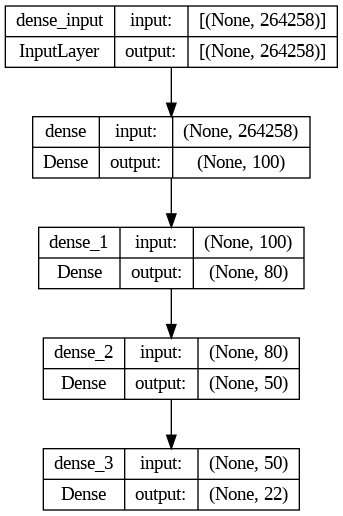

In [45]:
# architetcure of the MLP model

plot_model(model, show_shapes=True)

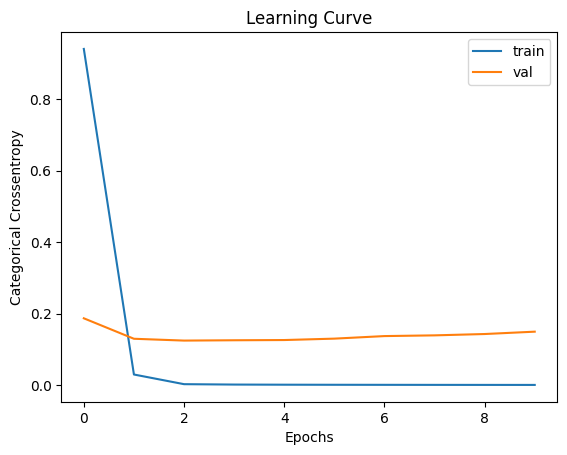

In [46]:
# creating loss vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

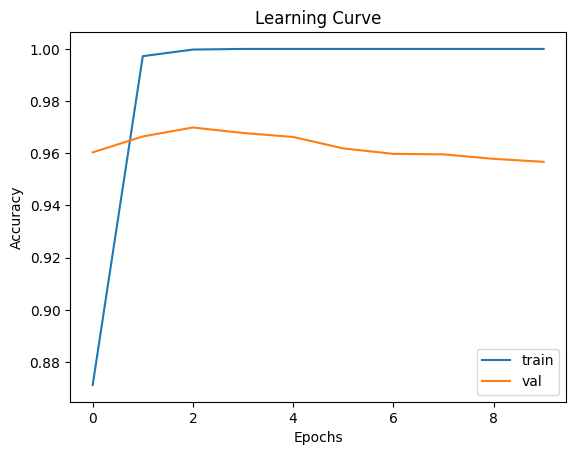

In [47]:
# creating accuracy vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [48]:
# evaluating the loss and accuracy of the model

loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Accuracy %.3f'%accuracy)

137/137 - 13s - loss: 0.1451 - accuracy: 0.9554 - 13s/epoch - 92ms/step
Accuracy 0.955


In [49]:
# defining input variable
# vectorizing input varible 'clean_text' into a matrix 

x = data['clean_text']

cv = CountVectorizer() # ngram_range=(1,2)
x = cv.fit_transform(x)

# changing the datatype of the number into uint8 to consume less memory
x = x.astype('uint8') # uint8 and float32

In [50]:
y = data['language_encoded']


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [52]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [53]:
# shapes of the various datasets

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(17487, 264258) (4372, 264258) (17487,) (4372,)


In [54]:
# input size hyperparameter

INPUT_SIZE = x_train.shape[1]
INPUT_SIZE

# outputsize hyperparatmeter

OUTPUT_SIZE = len(data['language_encoded'].unique())
OUTPUT_SIZE

22

In [55]:
BATCH_SIZE = 256
EPOCHS = 8

In [56]:
# configuring early stopping

es = EarlyStopping(monitor='accuracy', patience=1)

In [57]:
# creating the MLP model

model = Sequential([
    Dense(100, activation='softsign', kernel_initializer='glorot_uniform', input_shape=(INPUT_SIZE,)),
    Dense(80, activation='softsign', kernel_initializer='glorot_uniform'),
    Dense(50, activation='softsign', kernel_initializer='glorot_uniform'),
    Dense(OUTPUT_SIZE, activation='softmax')
])

In [58]:
# compiling the MLP model

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
# fitting the model with earlystopping callback to avoid overfitting 

hist = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.3, callbacks=[es], verbose=2)

Epoch 1/8
48/48 - 98s - loss: 1.6214 - accuracy: 0.9186 - val_loss: 0.7809 - val_accuracy: 0.9503 - 98s/epoch - 2s/step
Epoch 2/8
48/48 - 93s - loss: 0.3777 - accuracy: 0.9922 - val_loss: 0.3064 - val_accuracy: 0.9655 - 93s/epoch - 2s/step
Epoch 3/8
48/48 - 93s - loss: 0.1152 - accuracy: 0.9986 - val_loss: 0.1953 - val_accuracy: 0.9666 - 93s/epoch - 2s/step
Epoch 4/8
48/48 - 85s - loss: 0.0548 - accuracy: 0.9998 - val_loss: 0.1592 - val_accuracy: 0.9674 - 85s/epoch - 2s/step
Epoch 5/8
48/48 - 93s - loss: 0.0341 - accuracy: 0.9999 - val_loss: 0.1430 - val_accuracy: 0.9670 - 93s/epoch - 2s/step
Epoch 6/8
48/48 - 93s - loss: 0.0238 - accuracy: 0.9999 - val_loss: 0.1339 - val_accuracy: 0.9670 - 93s/epoch - 2s/step


In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               26425900  
                                                                 
 dense_5 (Dense)             (None, 80)                8080      
                                                                 
 dense_6 (Dense)             (None, 50)                4050      
                                                                 
 dense_7 (Dense)             (None, 22)                1122      
                                                                 
Total params: 26,439,152
Trainable params: 26,439,152
Non-trainable params: 0
_________________________________________________________________


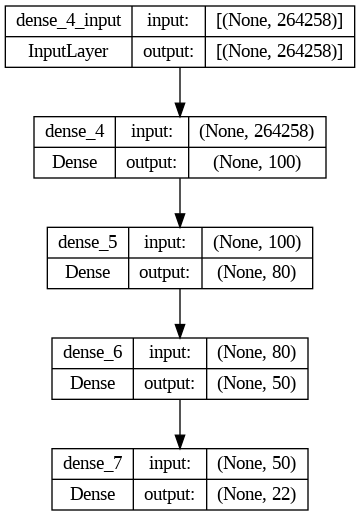

In [61]:
plot_model(model, show_shapes=True)

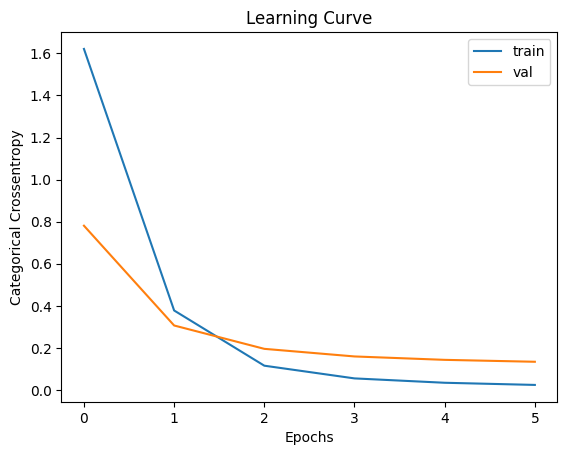

In [62]:
# creating loss vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

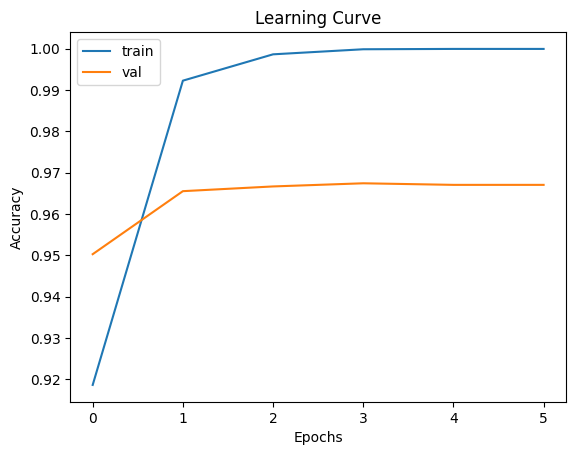

In [63]:
# creating accuracy vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [64]:
# evaluating the loss and accuracy of the model

loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Accuracy %.3f'%accuracy)

137/137 - 13s - loss: 0.1219 - accuracy: 0.9710 - 13s/epoch - 96ms/step
Accuracy 0.971


137/137 [==============================] - 13s 95ms/step


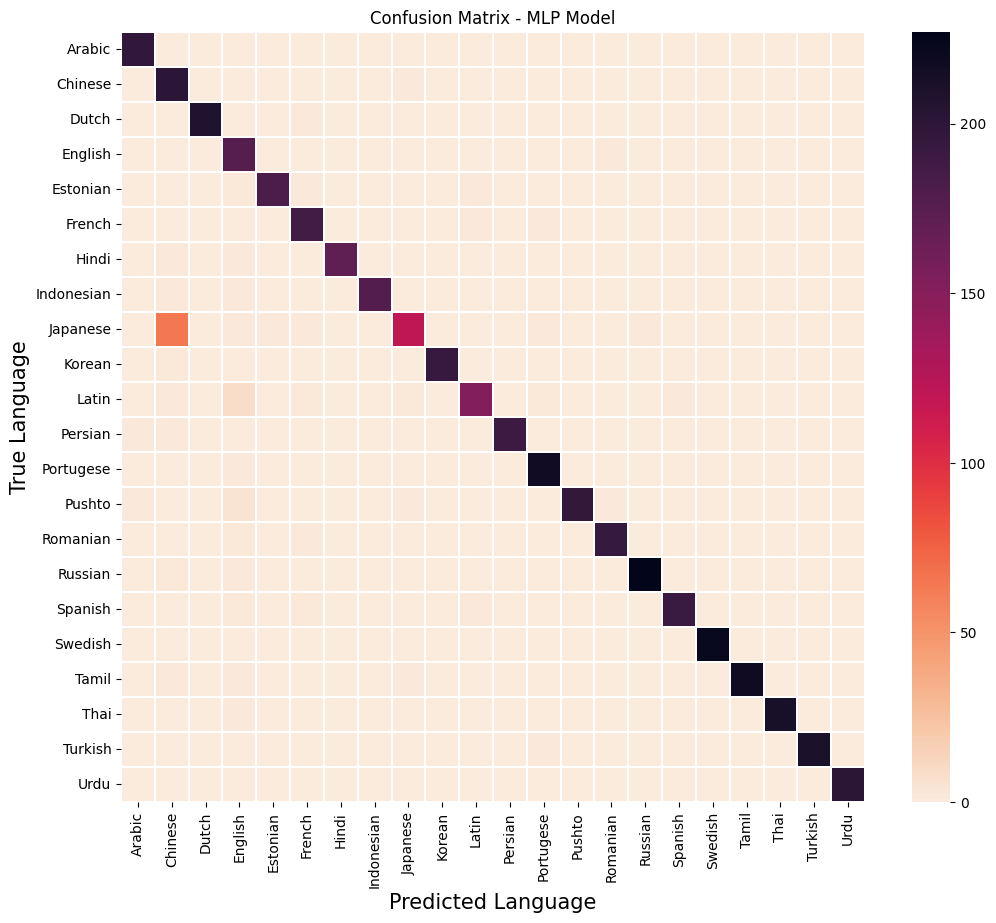

In [66]:
y_pred_prob = model.predict(x_test) # returns an array containing probability for each category being output
y_pred = []
for i in y_pred_prob:
    out = np.argmax(i) # taking the highest probability category as output
    y_pred.append(out)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_test, y_pred) # confusion matrix

# heat map of confusion matrix
plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - MLP Model')
sns.heatmap(cm, xticklabels=lang_list, yticklabels=lang_list, cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       197
           1       0.73      1.00      0.84       202
           2       1.00      1.00      1.00       208
           3       0.87      0.99      0.93       177
           4       0.99      0.98      0.99       185
           5       0.96      0.99      0.97       189
           6       1.00      0.99      0.99       173
           7       1.00      0.99      0.99       180
           8       0.96      0.63      0.76       189
           9       1.00      0.99      0.99       196
          10       0.98      0.90      0.94       168
          11       1.00      0.99      0.99       192
          12       0.98      1.00      0.99       218
          13       1.00      0.96      0.98       204
          14       0.99      0.98      0.99       198
          15       1.00      0.99      0.99       230
          16       0.99      0.97      0.98       197
          17       1.00    

In [68]:
# saving the model

model.save('language_identifcation_model.h5')

In [69]:
# loading the model

model = load_model('language_identifcation_model.h5')

In [70]:
# using the model for prediction

sent = """आप कितना सोचते हो
अगर आप ठिठुरती रातों को गिनें
अरे क्या आप मिल सकते हैं (अरे, क्या आप मिल सकते हैं?)
क्या तुम मिलोगे (क्या तुम मिलोगे?)
सर्दियों का अंत बताओ
एक कोमल वसंत के दिन तक
मैं चाहता हूं कि तुम तब तक रहो जब तक फूल खिल न जाएं
ज्यों का त्यों"""


sent = cv.transform([sent])
ans = model.predict(sent)
ans = np.argmax(ans)
le.inverse_transform([ans])

1/1 [==============================] - 0s 169ms/step


array(['Hindi'], dtype=object)